# Log VS LDA

In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer

In [2]:
df = pd.read_csv('breast-cancer.csv', index_col='id')

In [3]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})

C:\Users\Igor\AppData\Local\Temp\ipykernel_1576\3093193884.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['diagnosis'] = df['diagnosis'].replace({'M': 1, 'B': 0})


<Axes: >

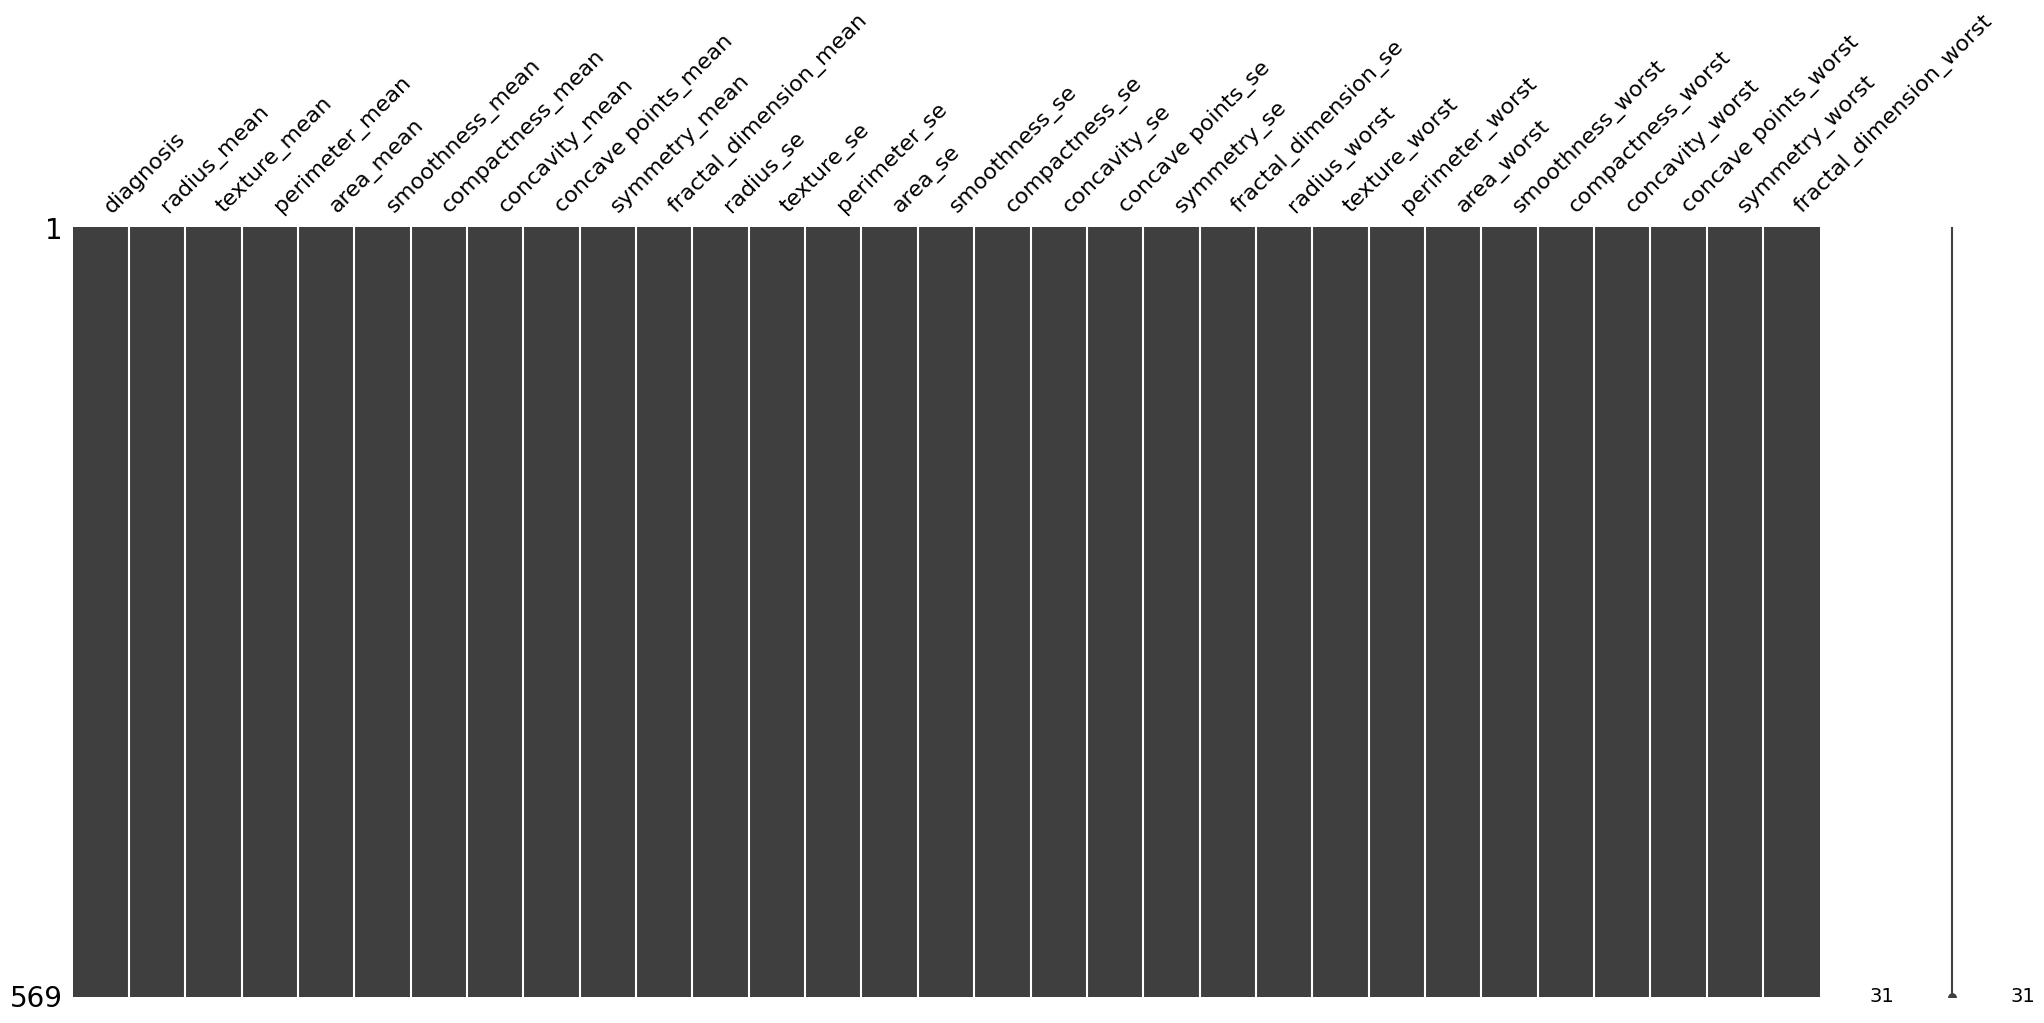

In [5]:
msno.matrix(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In [8]:
diagnos = df.diagnosis.value_counts()

In [9]:
diagnos.values

array([357, 212])

<Axes: xlabel='diagnosis'>

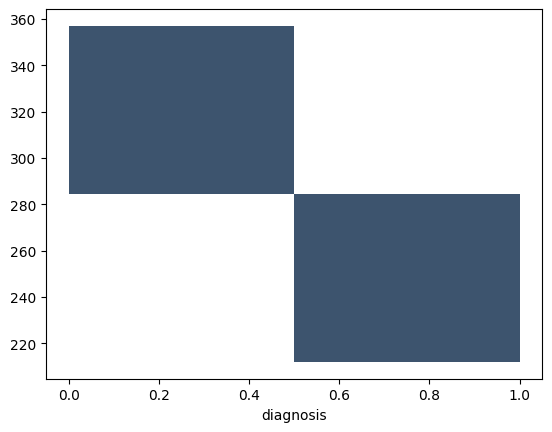

In [10]:
sns.histplot(x=diagnos.index, y=diagnos.values)

<Axes: >

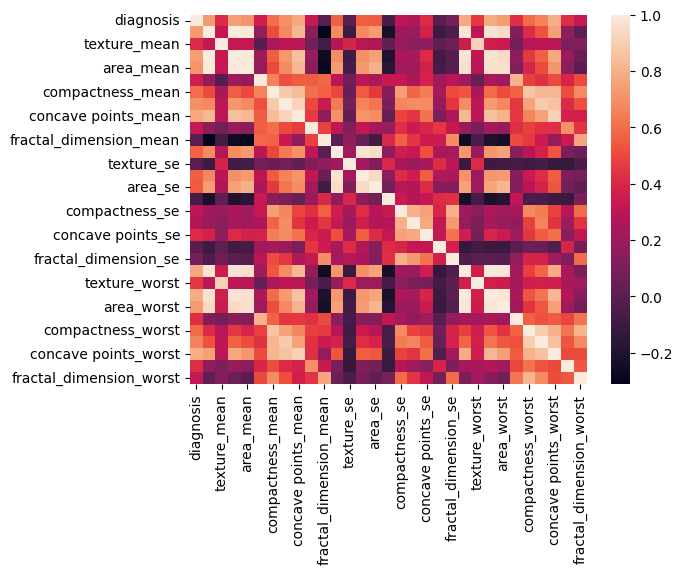

In [11]:
sns.heatmap(df.corr())

In [12]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [13]:
data = df.drop('diagnosis', axis=1)
target = df['diagnosis']

In [14]:
round_transformer = FunctionTransformer(lambda x: np.round(x, 2))

pipeline_LDA = Pipeline([
    ('scaler', StandardScaler()),
    ('round', round_transformer),
    ('model', LinearDiscriminantAnalysis())
])

pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('round', round_transformer),
    ('model', LogisticRegression())
])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=41, shuffle=True, stratify=target)

In [16]:
pipeline_LDA.fit(X_train, y_train)
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('round',
                 FunctionTransformer(func=<function <lambda> at 0x000001A13FEC72E0>)),
                ('model', LogisticRegression())])

In [17]:
predict_LDA = pipeline_LDA.predict(X_test)
predict_log = pipeline_log.predict(X_test)

In [18]:
print("Accuracy:", accuracy_score(y_test, predict_LDA)) 
print("\nClassification Report:\n", classification_report(y_test, predict_LDA))

Accuracy: 0.965034965034965

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

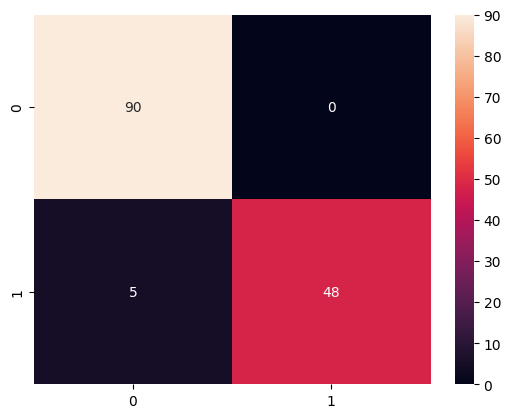

In [19]:
sns.heatmap(confusion_matrix(y_test, predict_LDA), annot=True)

In [20]:
print("Accuracy:", accuracy_score(y_test, predict_log)) 
print("\nClassification Report:\n", classification_report(y_test, predict_log))

Accuracy: 0.993006993006993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



<Axes: >

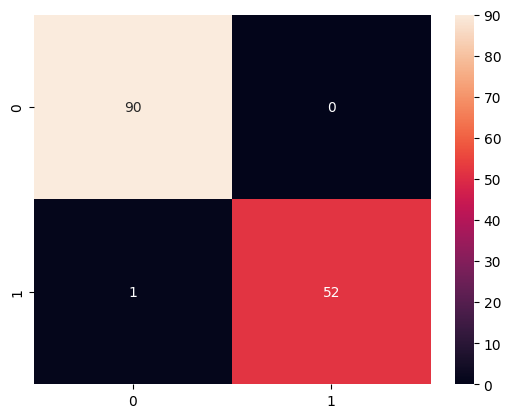

In [21]:
sns.heatmap(confusion_matrix(y_test, predict_log), annot=True)

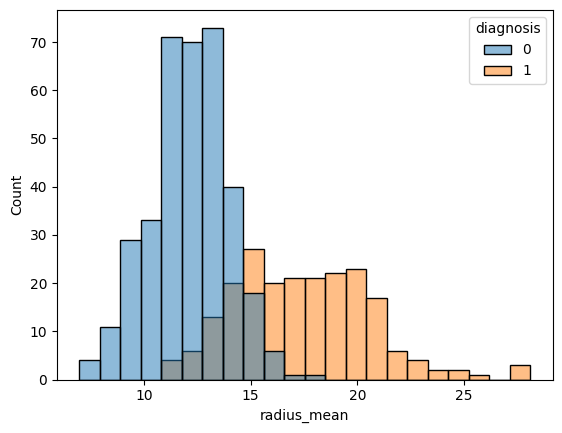

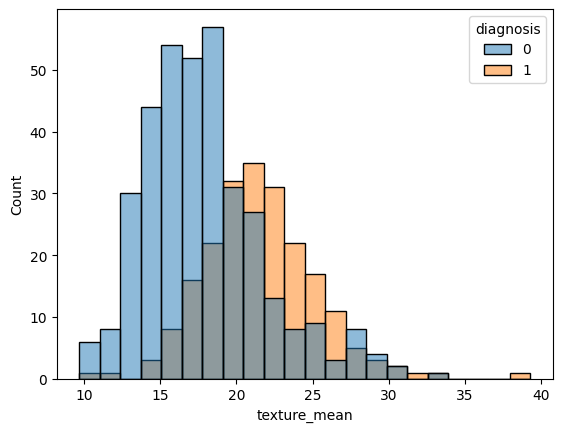

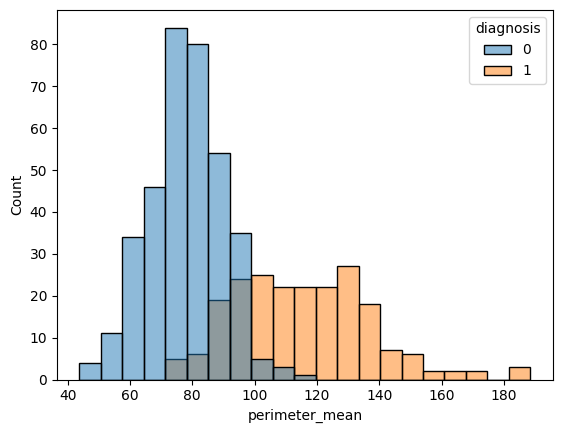

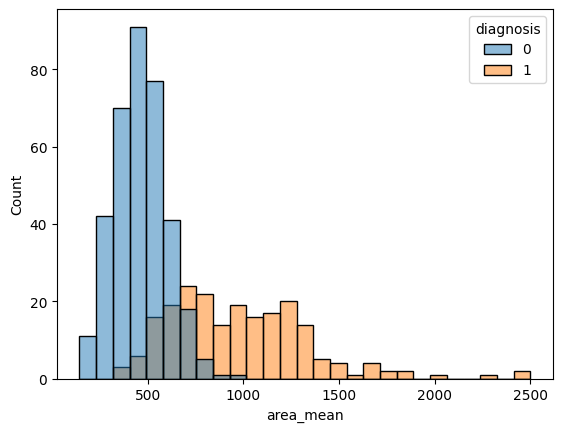

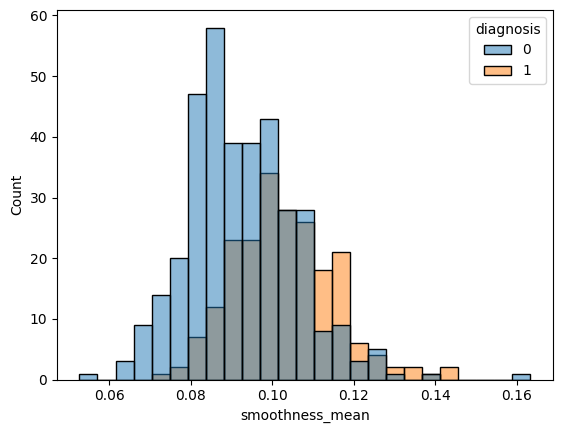

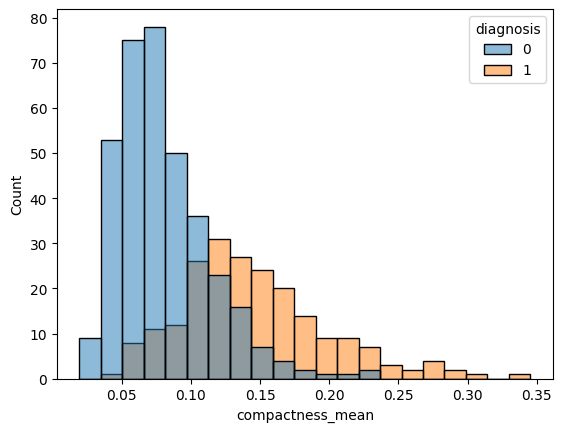

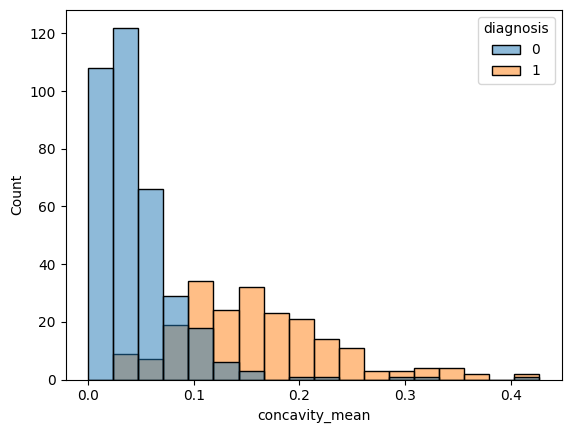

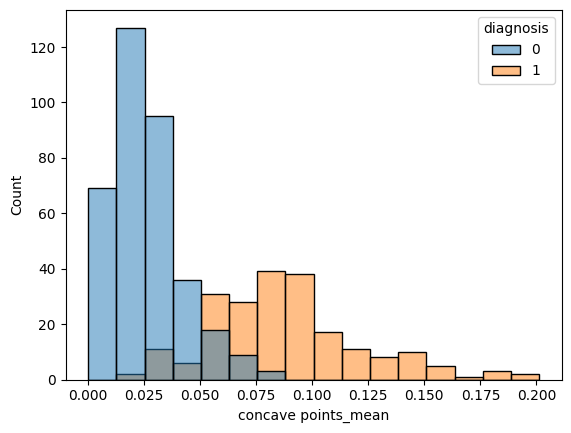

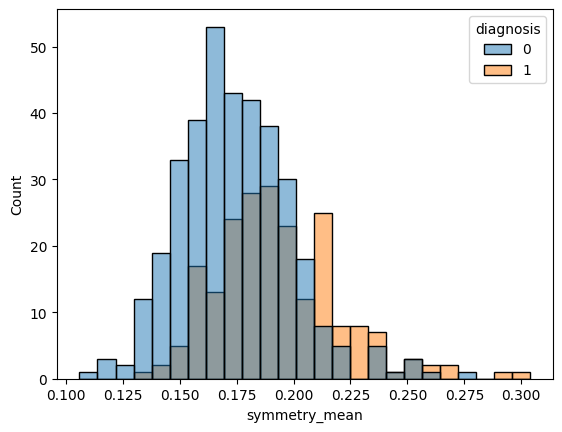

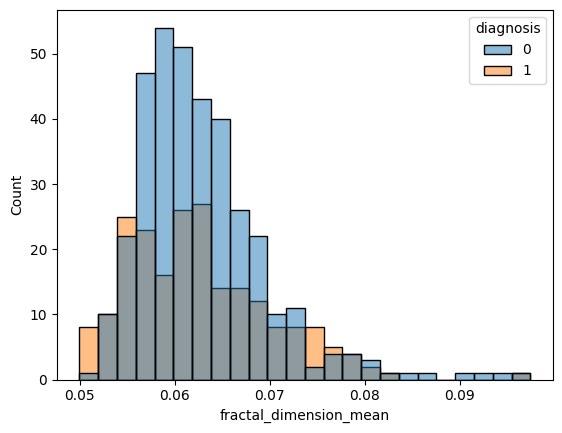

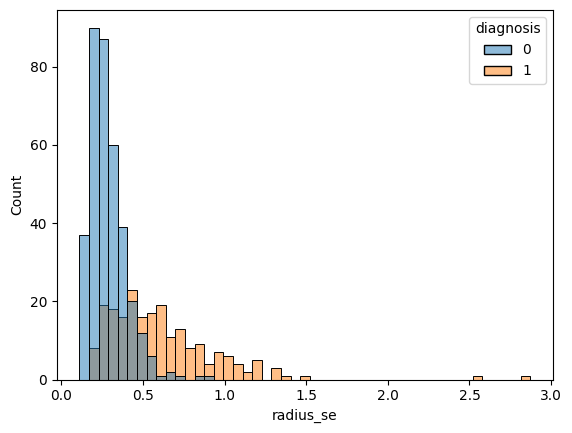

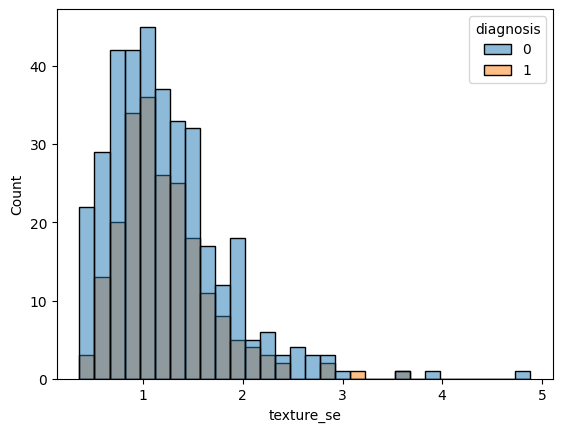

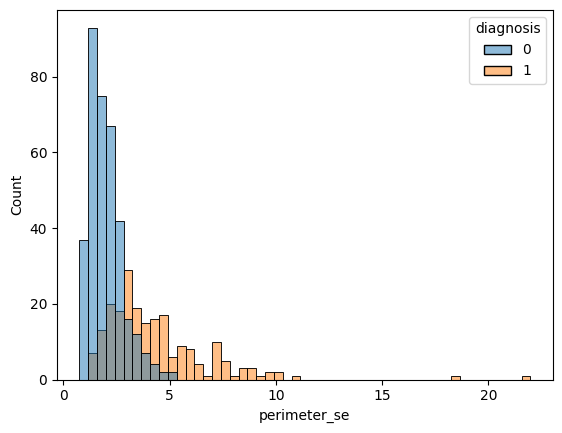

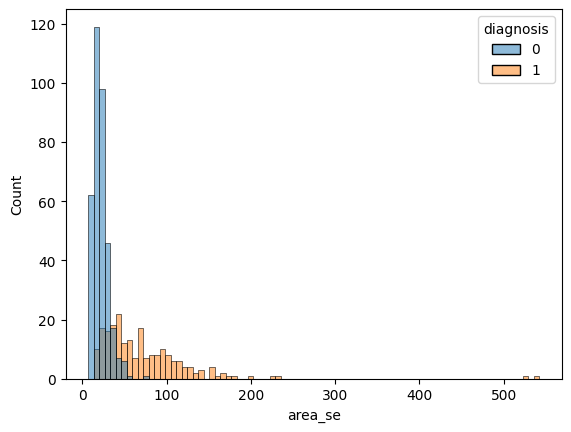

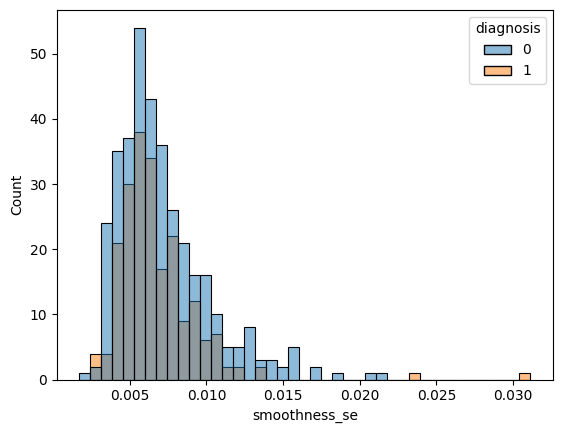

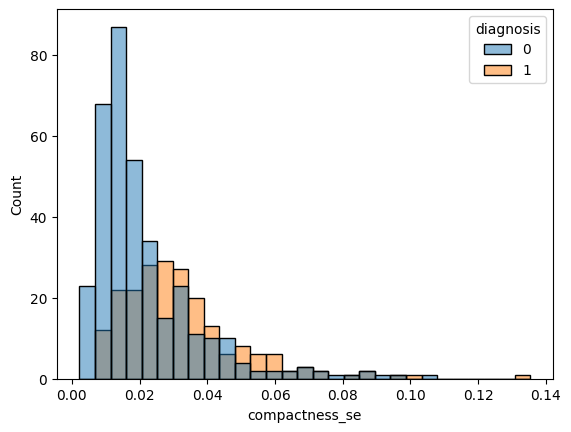

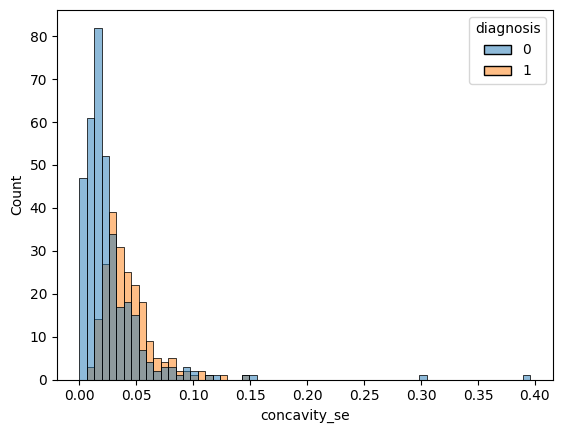

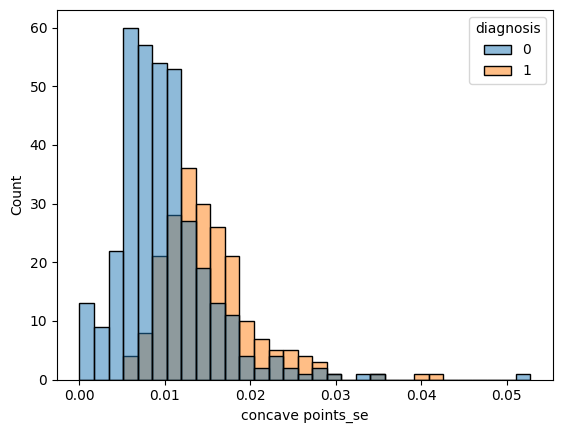

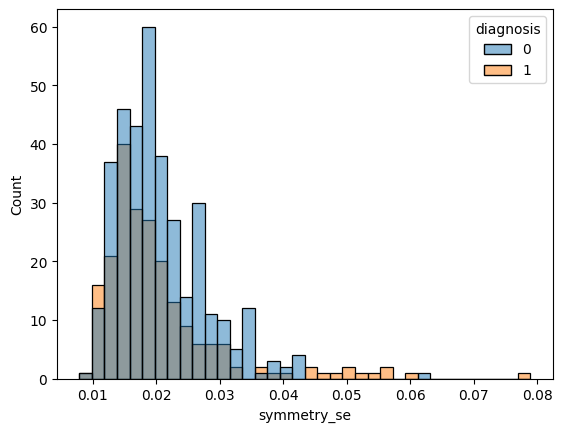

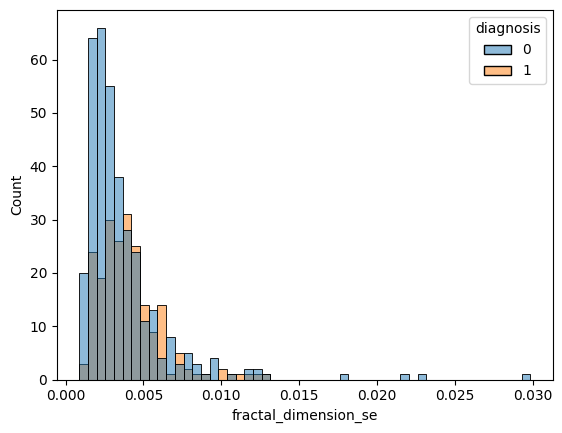

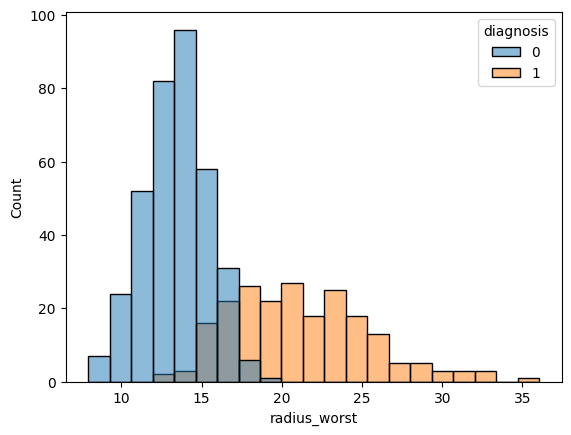

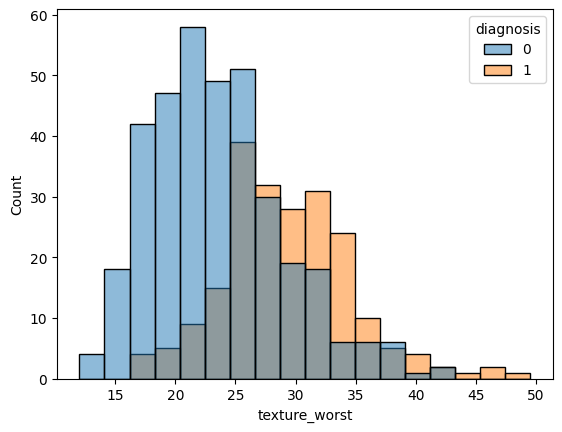

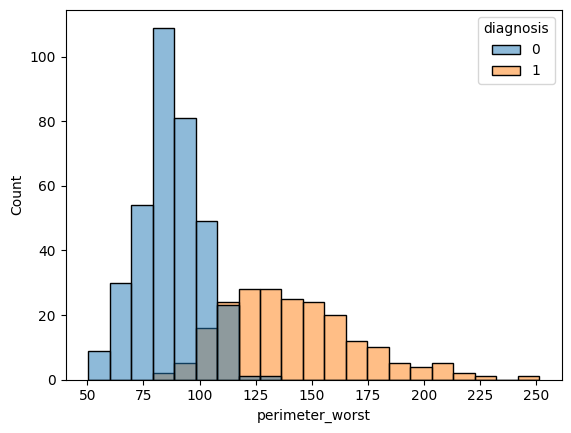

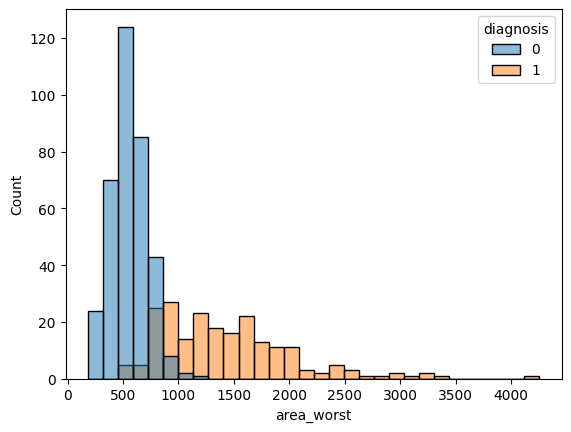

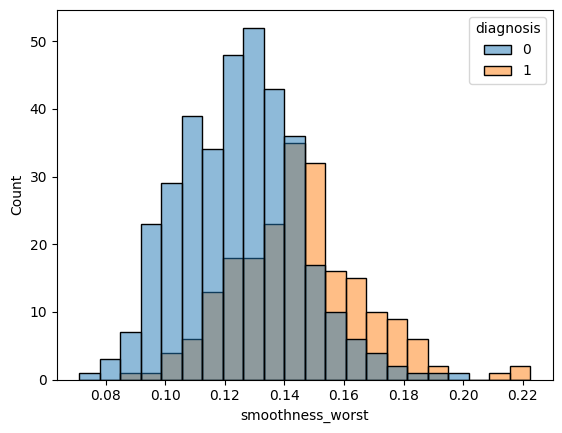

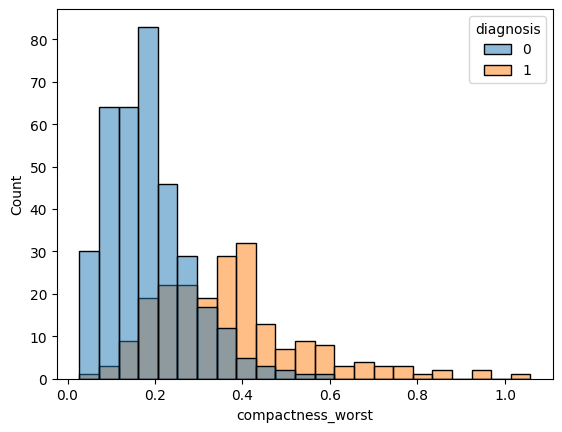

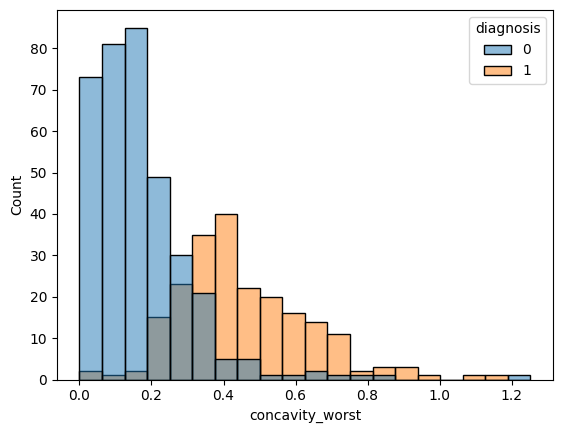

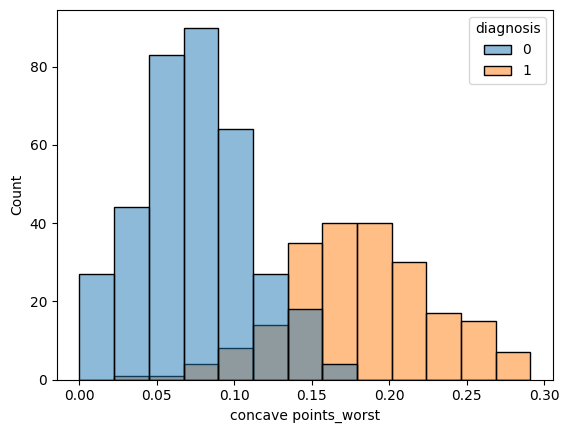

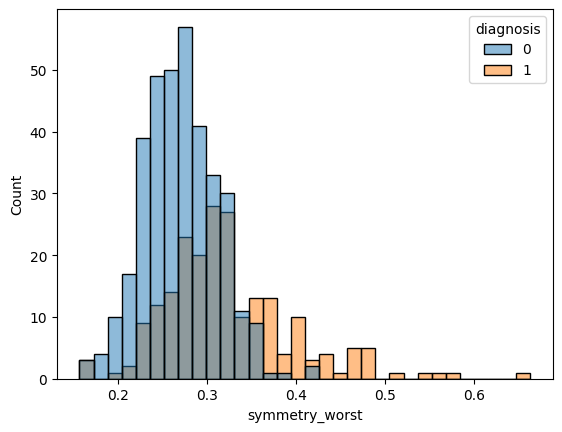

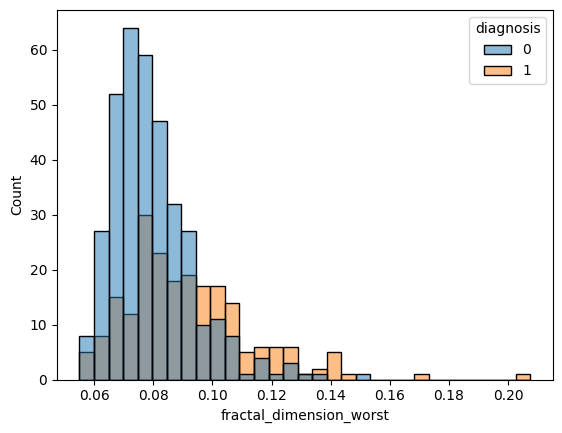

In [22]:
for i in data.columns:
    if i != 'diagnosis':
        sns.histplot(data=df, x=i, hue='diagnosis')
        plt.show()

In [23]:
df = df.drop(['fractal_dimension_mean', 'texture_se', 'smoothness_se', 'symmetry_se', 'fractal_dimension_se'], axis=1)
data = df.drop('diagnosis', axis=1)
target = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=41, shuffle=True)

In [24]:
pipeline_LDA.fit(X_train, y_train)
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('round',
                 FunctionTransformer(func=<function <lambda> at 0x000001A13FEC72E0>)),
                ('model', LogisticRegression())])

In [25]:
predict_LDA = pipeline_LDA.predict(X_test)
predict_log = pipeline_log.predict(X_test)

In [26]:
print("Accuracy:", accuracy_score(y_test, predict_LDA)) 
print("\nClassification Report:\n", classification_report(y_test, predict_LDA))

Accuracy: 0.965034965034965

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       1.00      0.91      0.95        53

    accuracy                           0.97       143
   macro avg       0.97      0.95      0.96       143
weighted avg       0.97      0.97      0.96       143



<Axes: >

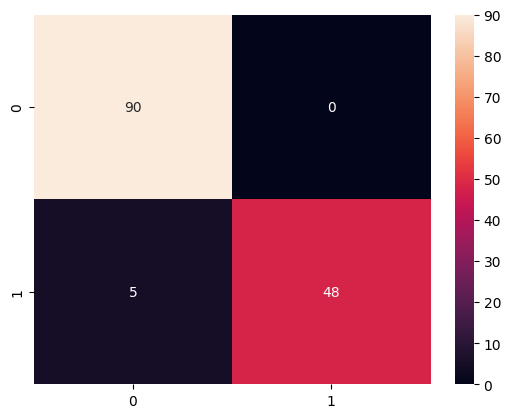

In [27]:
sns.heatmap(confusion_matrix(y_test, predict_LDA), annot=True)

In [28]:
print("Accuracy:", accuracy_score(y_test, predict_log)) 
print("\nClassification Report:\n", classification_report(y_test, predict_log))

Accuracy: 0.993006993006993

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       1.00      0.98      0.99        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



<Axes: >

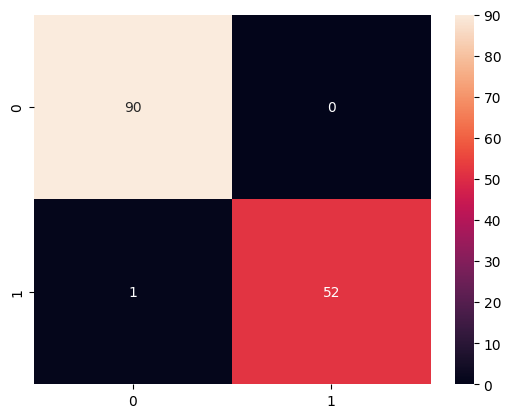

In [29]:
sns.heatmap(confusion_matrix(y_test, predict_log), annot=True)

In [30]:
X_test['predict'] = pipeline_log.predict(X_test)

In [31]:
X_test['real_val'] = y_test

In [32]:
X_test[(X_test.real_val!=X_test.predict)]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,predict,real_val
id,,,,,,,,,,,,,,,,,,,,,
874858,14.22,23.12,94.37,609.9,0.1075,0.2413,0.1981,0.06618,0.2384,0.286,...,106.4,762.4,0.1533,0.9327,0.8488,0.1772,0.5166,0.1446,0,1


In [33]:
df[df.diagnosis==1].describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,212.0,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,...,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,1.0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
std,0.0,3.203971,3.779470,21.854653,367.937978,0.012608,0.053987,0.075019,0.034374,0.027638,...,4.283569,5.434804,29.457055,597.967743,0.021870,0.170372,0.181507,0.046308,0.074685,0.021553
min,1.0,10.950000,10.380000,71.900000,361.600000,0.073710,0.046050,0.023980,0.020310,0.130800,...,12.840000,16.670000,85.100000,508.100000,0.088220,0.051310,0.023980,0.028990,0.156500,0.055040
25%,1.0,15.075000,19.327500,98.745000,705.300000,0.094010,0.109600,0.109525,0.064620,0.174050,...,17.730000,25.782500,119.325000,970.300000,0.130475,0.244475,0.326425,0.152750,0.276500,0.076302
50%,1.0,17.325000,21.460000,114.200000,932.000000,0.102200,0.132350,0.151350,0.086280,0.189900,...,20.590000,28.945000,138.000000,1303.000000,0.143450,0.356350,0.404900,0.182000,0.310300,0.087600
75%,1.0,19.590000,23.765000,129.925000,1203.750000,0.110925,0.172400,0.203050,0.103175,0.209850,...,23.807500,32.690000,159.800000,1712.750000,0.155975,0.447850,0.556175,0.210675,0.359225,0.102625
max,1.0,28.110000,39.280000,188.500000,2501.000000,0.144700,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.170000,0.291000,0.663800,0.207500


In [34]:
from sklearn.decomposition import PCA

In [35]:
X = X_test.drop('predict', axis=1)

In [36]:
pca = PCA(n_components=2)
cord = pca.fit_transform(X.drop('real_val', axis=1))

In [37]:
pca_df = pd.DataFrame(cord, columns = ['PCA1', 'PCA2'])

In [38]:
pca_df.index = X.index

In [39]:
comb = pd.concat([pca_df, X.real_val], axis=1)

In [40]:
comb['color'] = ['red' if x == True else 'blue' for x in comb['real_val']]

In [41]:
comb.loc[874858, 'color'] = 'black'

In [42]:
comb.color.unique()

array(['blue', 'red', 'black'], dtype=object)

[]

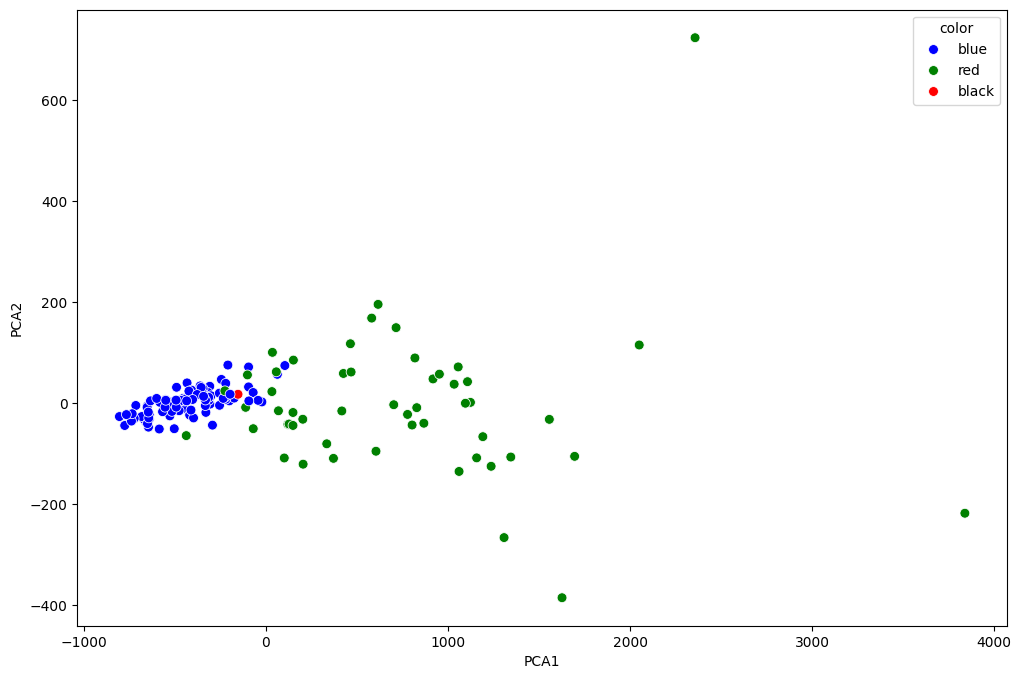

In [43]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=comb,
    x='PCA1', 
    y='PCA2', 
    hue='color',
    palette = ['blue', 'green', 'red'],# Используем цвет для выделения
    s=50  # Размер маркеров
)
plt.plot()